In [2]:
import pytest
import numpy as np
import finite
import timesteppers
import equations
from IPython.display import clear_output
import matplotlib.pyplot as plt

def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.tight_layout()

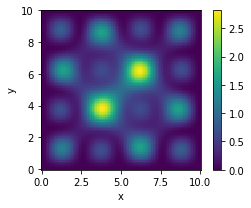

In [2]:
resolution = 100
grid_x = finite.UniformNonPeriodicGrid(resolution,(0,10))
grid_y = finite.UniformNonPeriodicGrid(resolution,(0,10))
domain = finite.Domain([grid_x, grid_y])
x, y = domain.values()


IC = np.sin(np.pi*(x)/10)*np.sin(np.pi*(y)/10)+np.sin(4*np.pi*(x)/10)*np.sin(4*np.pi*(y)/10)
c = IC.astype(complex)

diff = equations.SchrodingerBCLinear(c,2, domain)

alpha = 0.2
dt = alpha*grid_y.dx
n=0
cadence = 10
xm, ym  = np.meshgrid(x, y)
while diff.t < 5 - 1e-5:
    if n % cadence == 0 :
        data = np.abs(c)**2
        clear_output(wait=True)
        plot_2D_field(xm,ym,data)
        plt.show()
    n = n+1
    diff.step(dt)

(100, 100)

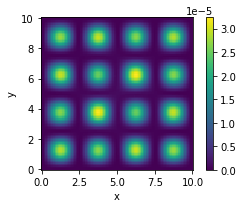

In [3]:
t = 5
x, y = domain.values()
sol = np.sin(np.pi*(x)/10)*np.sin(np.pi*(y)/10)*np.exp(-1j*np.pi**2/100*t)+np.sin(4*np.pi*(x)/10)*np.sin(4*np.pi*(y)/10)*np.exp(-1j*16*np.pi**2/100*t)
data2 = abs(sol)**2
plot_2D_field(xm,ym,abs(sol-c)**2)
np.shape(sol)


In [4]:
abs((c-sol)).max()


0.005691324740161918

In [5]:
abs((data-data2)).max()*8


2.718969972625617

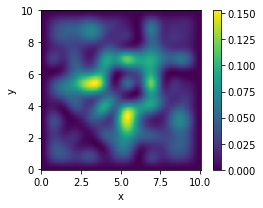

In [30]:
resolution = 200
grid_x = finite.UniformNonPeriodicGrid(resolution,(0,10))
grid_y = finite.UniformNonPeriodicGrid(resolution,(0,10))
domain = finite.Domain([grid_x, grid_y])
x, y = domain.values()


IC = np.exp(-(x-5)**2)*np.exp(-(y-5)**2)*np.exp(1j*t)
c = IC.astype(complex)

diff = equations.SchrodingerBCNonLinear(c,2,2, domain)

alpha = 0.2
dt = alpha*grid_y.dx
n=0
cadence = 10
xm, ym  = np.meshgrid(x, y)
while diff.t < 5 - 1e-5:
    if n % cadence == 0 :
        data = np.abs(c)**2
        clear_output(wait=True)
        plot_2D_field(xm,ym,data)
        plt.show()
    n = n+1
    diff.step(dt)

(200, 200)

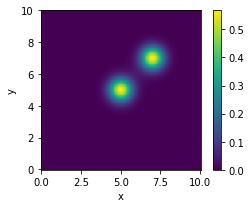

In [28]:
t = 200
x, y = domain.values()
sol = (np.exp(-(x-5)**2)*np.exp(-(y-5)**2)*np.cos(10*t)/np.cosh(1j*t) + np.exp(-(x-7)**2)*np.exp(-(y-7)**2)*np.cos(10*t)/np.cosh(1j*t))
plot_2D_field(xm,ym,abs(sol)**2)
np.shape(sol)


In [ ]:
from matplotlib import pyplot as plt

import numpy as np

    

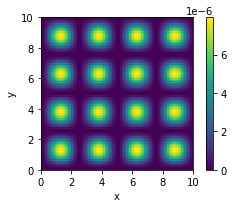

In [ ]:
resolution = 100
grid_x = finite.UniformPeriodicGrid(resolution, 10)
grid_y = finite.UniformPeriodicGrid(resolution, 10)
domain = finite.Domain((grid_x, grid_y))
x, y = domain.values()


IC = np.sin((x-1)/10*np.pi)*np.sin((y-1)/10*np.pi)/5

IC = np.sin(4*(x)/10*np.pi)*np.sin(4*(y)/10*np.pi)/5

u = np.zeros(domain.shape)
v = np.zeros(domain.shape)

u[:] = IC/100
v[:] = IC/100
burgers_problem = equations.Schrodinger2DLinear(u, v,2, domain)
alpha = 0.2
dt = alpha*grid_x.dx
cadence = 1
n=0
xm, ym = domain.plotting_arrays()
while burgers_problem.t < 1-1e-5:
    
    if n % cadence == 0 :
        data = v**2+u**2
        clear_output(wait=True)
        plot_2D_field(xm,ym,data)
        plt.show()
    n = n+1
    burgers_problem.step(dt)

In [ ]:

IC = np.sin(4*(x)/10*np.pi)*np.sin(4*(y)/10*np.pi)/5
plot_2D_field(xm,ym,IC)

In [ ]:
C = np.zeros((2,2),dtype=np.complex_)
A = np.zeros((2,2))

In [ ]:
A[0,0] = C[0,0]

In [ ]:
from scipy import sparse
M = sparse.eye(10,  10)

M


<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements (1 diagonals) in DIAgonal format>

In [ ]:
M = sparse.bmat([[M, M],
                              [M, M]])

In [ ]:
M

<20x20 sparse matrix of type '<class 'numpy.complex128'>'
	with 40 stored elements in COOrdinate format>